# Modelación Computacional de Sistemas Complejos.
## Temas Selectos de Física Computacional I

### Sergio A. Alcalá Corona 
---
#### Sergio A. Sánchez Chávez
#### Osvaldo Puebla Cerezo

---
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib notebook

# 2. Análisis de Sistemas Dinámicos No Lineales (parte 1).

## Ejemplo: Pendulo Simple.

## $\dot{\theta} = v$ 
## $\dot{v_{\theta}} = - \omega_0^2 sen(\theta)$

### $\omega_0^2 = \dfrac{g}{l}$



In [2]:
def PenduloSimple1(x):  # x es un vector en 2D  (x,v)
    
    w0 = 1
    
    y = np.array(np.zeros(2))
    
    y[0] = x[1]
    y[1] = -w0*math.sin(x[0])

    return y

### Metodo de Euler $n$ Dimensiones con opción de agregar parametros

In [3]:
def EulerND(f,x0,t0,tf,dt,params):
        
    T=[]
    X=[]

    for i in range(len(x0)):
        a = []
        X.append(a)
        X[i].append(x0[i])

    T.append(t0)

    t=t0
    x=x0

    while (t<tf):
        x = x + f(x,params)*dt
        t = t + dt
        for i in range(len(x0)):
            X[i].append(x[i])
        T.append(t)

    return X,T

In [4]:
def PenduloSimple(x,params):  # x es un vector en 2D  (x,v)
    
    w0 = params[0]
    
    y = np.array(np.zeros(2))
    
    y[0] = x[1]
    y[1] = -w0*math.sin(x[0])

    return y

In [8]:
x0 = np.array([3.15,0]) 

parametros = np.array([1.0])
X,T = EulerND(PenduloSimple,x0,0,50,0.001,parametros)

plt.plot(X[0],X[1])
plt.plot(x0[0],x0[1],'ro') #condicion inicial

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title("Espacio Fase $\\theta$ vs $v_{\\theta}(t)$")
plt.xlabel("$\\theta$")
plt.ylabel("$v_{\\theta}$")

Text(47.097222222222214, 0.5, '$v_{\\theta}$')

<IPython.core.display.Javascript object>


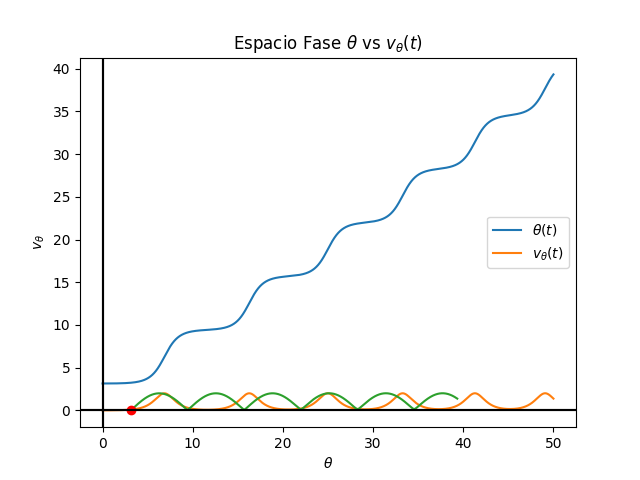

Text(0, 0.5, '$\\theta(t)$ y $v_{\\theta}(t)$')

In [7]:
plt.plot(T,X[0], label ='$\\theta(t)$') 
plt.plot(T,X[1], label ='$v_{\\theta}(t)$')
plt.legend()

plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.title("Serie de Tiempo $\\theta(t)$ y $v_{\\theta}(t)$ vs $t$")
plt.xlabel("$t$")
plt.ylabel("$\\theta(t)$ y $v_{\\theta}(t)$")

<IPython.core.display.Javascript object>


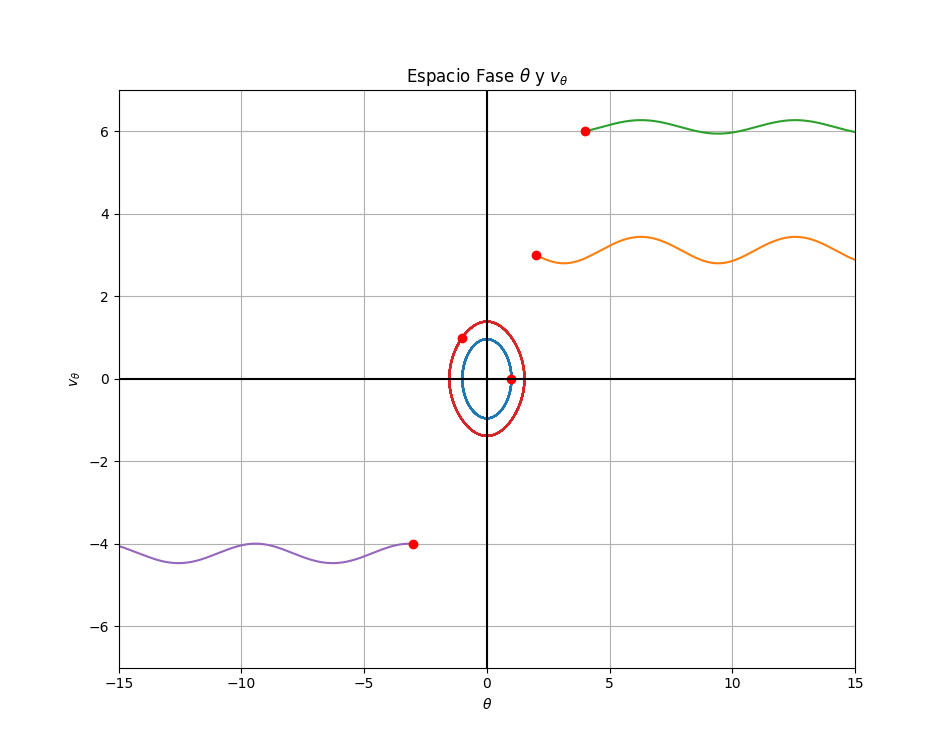

In [9]:
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)

parametros = np.array([1.0])

for i, j in [[1,0], [2,3], [4,6], [-1,1], [-3,-4]]:
    x0 = np.array([i,j])

    X,T = EulerND(PenduloSimple,x0,0,50,0.0001,parametros)

    plt.plot(X[0],X[1])
    plt.plot(x0[0],x0[1],'ro') # Condicion inicial

plt.title("Espacio Fase $\\theta$ y $v_{\\theta}$")
plt.xlabel("$\\theta$ ")
plt.ylabel("$v_{\\theta}$")

plt.xlim([-15, 15])
plt.ylim([-7, 7])
plt.axhline(0, color='black')
plt.axvline(0, color='black')

## Campo de Pendientes

In [33]:
#Campo Vectorial    
def CampoPend(f,xmin,xmax,ymin,ymax,params,escala,paso): 
    
    for i in np.arange(xmin,xmax, paso):
        for j in np.arange(ymin,ymax, paso):
            v = np.array([i,j])
            y = f(v,params)
            
            plt.quiver(i, j, y[0], y[1] , width=0.001, scale=escala)

    plt.axhline(0, color='black')
    plt.axvline(0, color='black')    
    
    
############ Version Normalizada, para una mejor visulacizacion (campo de direcciones) #################     

def CampoPendNorm(f,xmin,xmax,ymin,ymax,params,paso):    
    
    for i in np.arange(xmin,xmax, paso):
        for j in np.arange(ymin,ymax, paso):
            v = np.array([i,j])
            y = f(v,params)
            
            N = np.sqrt(y[0]**2+y[1]**2)  #aqui se calcula la norma del vector
            
            if (N != 0): # y se normaliza si el vector es diferente del vector 0
                U, V = float(y[0])/float(N), float(y[1])/float(N)
            else:
                U, V = y[0],y[1]

            plt.quiver(i, j, U, V , width=0.001, scale=50)

    plt.axhline(0, color='black')
    plt.axvline(0, color='black')    
       
        

### Funciones (con parametros) para los Osciladores

In [11]:
def OsciladorSimple(x,params):  # x es un vector en 2D  (x,v)
    
    w0 = params[0]
    y = np.array(np.zeros(2))
    
    y[0] = x[1]
    y[1] = -w0*x[0]

    return y

def OsciladorAmortiguado(x,params):  # x es un vector en 2D  (x,v)
    
    w0 = params[0]
    beta = params[1]
    y = np.array(np.zeros(2))
    
    y[0] = x[1]
    y[1] = -w0*x[0] - beta*x[1]

    return y

<IPython.core.display.Javascript object>


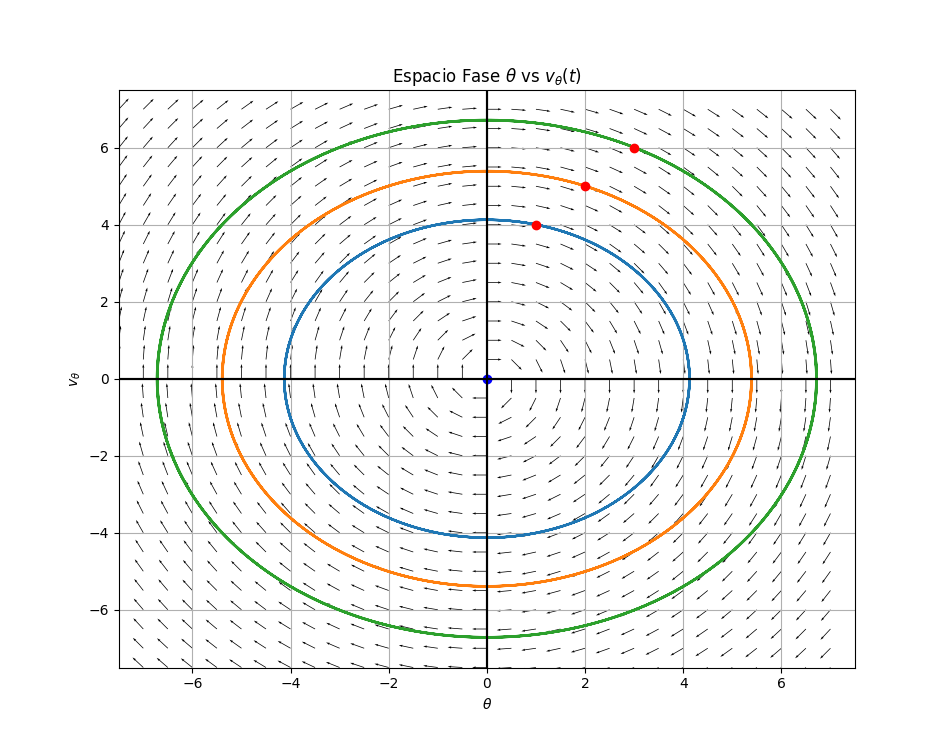

In [12]:
# Condciones para la grafica
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)


params = np.array([1])  #parametos (w0 = 1)

for i, j in zip([1, 2, 3], [4, 5, 6]): # Integrando y graficando varias solucuiones con condiciones
    x0 = np.array([i,j])

    X,T = EulerND(OsciladorSimple,x0,0,50,0.0001,params)

    plt.plot(X[0],X[1])
    plt.plot(x0[0],x0[1],'ro')  #Condicion inicilal
    
    
#### Grafica ######## 

plt.plot(0, 0,'bo')  # punto de equilibrio  (en este caso solo es el origen) 
    
# Titulos de la grafica
plt.title("Espacio Fase $\\theta$ vs $v_{\\theta}(t)$")
plt.xlabel("$\\theta$")
plt.ylabel("$v_{\\theta}$")

# Ejes y limites de la grafica
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlim([-7.5, 7.5])
plt.ylim([-7.5, 7.5])

## Dibujando campo de pendientes

# CampoPend(OsciladorSimple,-7.5,7.5,-7.5,7.5,params,250,0.5)
CampoPendNorm(OsciladorSimple,-7.5,7.5,-7.5,7.5,params,0.5) #version normalizada

<IPython.core.display.Javascript object>


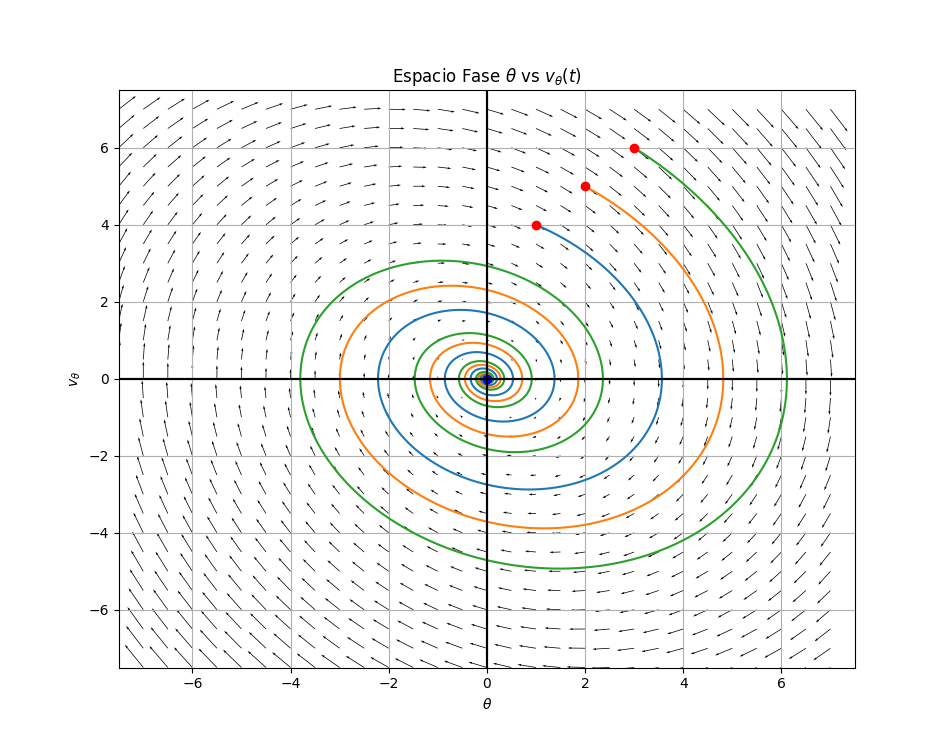

In [13]:
# Condciones para la grafica
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)


params = np.array([1,.3])  #parametos (w0 = 1, beta = 0.3)

for i, j in zip([1, 2, 3], [4, 5, 6]): # Integrando y graficando varias solucuiones con condiciones
    x0 = np.array([i,j])

    X,T = EulerND(OsciladorAmortiguado,x0,0,50,0.001,params)

    plt.plot(X[0],X[1])
    plt.plot(x0[0],x0[1],'ro')  #Condicion inicilal
    
    
#### Grafica ######## 

plt.plot(0, 0,'bo')  # punto de equilibrio  (en este caso solo es el origen) 
    
# Titulos de la grafica
plt.title("Espacio Fase $\\theta$ vs $v_{\\theta}(t)$")
plt.xlabel("$\\theta$")
plt.ylabel("$v_{\\theta}$")

# Ejes y limites de la grafica
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlim([-7.5, 7.5])
plt.ylim([-7.5, 7.5])

## Dibujando campo de pendientes 

CampoPend(OsciladorAmortiguado,-7.5,7.5,-7.5,7.5,params,300,0.5)
# CampoPendNorm(OsciladorAmortiguado,-7.5,7.5,-7.5,7.5,params,0.5) #version normalizada


### Campo de Pendientes Pendulo Simple

<IPython.core.display.Javascript object>


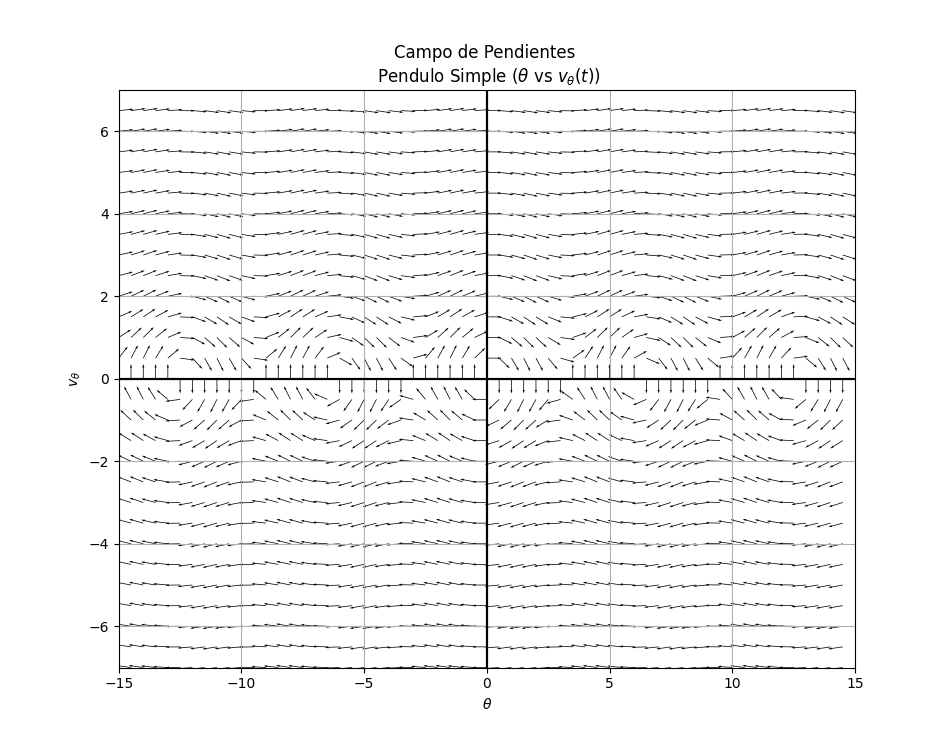

In [14]:
#### Grafica ######## 
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)
   
# Titulos de la grafica
plt.title("Campo de Pendientes \n Pendulo Simple ($\\theta$ vs $v_{\\theta}(t)$)")
plt.xlabel("$\\theta$")
plt.ylabel("$v_{\\theta}$")

# Ejes y limites de la grafica
plt.axhline(0, color='black')
plt.axvline(0, color='black') 
plt.xlim([-15, 15])
plt.ylim([-7, 7])

###### Dibujando campo de pendientes ######## 

parametros = np.array([1.0])  # parametos (w0 = 1)

# CampoPend(PenduloSimple,-15, 15,-7,7,parametros,100,0.5)
CampoPendNorm(PenduloSimple,-15, 15,-7,7,parametros,0.5) #version normalizada    
 

## ¿Qué hacemos cuando un sistema es no lineal?

### Hay que "linelizar" el sistema

### Para linelizar el sistema hay que partir de un punto de equilibrio y hacer una expanción de Tylor.

### Dado el sistema:

## $\dot{\vec{x}}(t) = \vec{f}(\vec{x},t) = \mathbb{A} \vec{x}(t) $  

## $ \vec{f}(\vec{x}) = (f_1(\vec{x}), f_2(\vec{x}), \cdots, f_m(\vec{x})) $  

Podemos expandirlo de manera "muy general" de la siguiente manera

## $
\begin{pmatrix} 
\dot{x}_1  \\
\dot{x}_2  \\
\vdots \\
\dot{x}_n
\end{pmatrix}
=
\begin{pmatrix}
\frac{\partial f_1}{\partial x_1}  & \frac{\partial f_1}{\partial x_2}  & \cdots & \frac{\partial f_1}{\partial x_n}  \\
\frac{\partial f_2}{\partial x_1}  & \frac{\partial f_2}{\partial x_2}& \cdots & \frac{\partial f_2}{\partial x_n} \\
\vdots  & \vdots  & \ddots & \vdots  \\
\frac{\partial f_m}{\partial x_1} & \frac{\partial f_m}{\partial x_2}  & \cdots & \frac{\partial f_m}{\partial x_n}  
\end{pmatrix}
\begin{pmatrix} 
x_1  \\
x_2  \\
\vdots \\
x_n  \\
\end{pmatrix}
$  + otros términos


Dicho sistema tiene $n$ puntos de equilibrio y sus estabilidad depende de los valores y vectores propios de la matriz $\mathbb{A}$.

Los puntos de equilibrio se encuentran al resolver:

### $f(\vec{x},t) = \vec{0}$

### $\dot{\vec{x}^{*}}(t) = \vec{0}$

Es decir donde las soluciones no cambian en el tiempo. O bien:

### $f(\vec{x}^*,t) = \vec{0}$

### $\mathbb{A} \vec{x}^{*} = \vec{0}$

## $
\begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots  & \vdots  & \ddots & \vdots  \\
a_{m1} & a_{m2} & \cdots & a_{mn} 
\end{pmatrix}
\begin{pmatrix} 
x_1^*  \\
x_2^*  \\
\vdots \\
x_n^*  \\
\end{pmatrix}
=
\begin{pmatrix} 
0  \\
0  \\
\vdots \\
0
\end{pmatrix}
$

Nota: Sólo funciona para ecuaciones autonomas, es decir, $f(\vec{x},t) = f(\vec{x})$ o bien para ecuaciones tipo $\dot{\vec{x}}(t) = f(\vec{x},t) = \mathbb{A} \vec{x}(t)$, donde $\mathbb{A}$ tiene coeficientes constatntes $A_{ij} \neq a_{ij}(t)$

## Ejemplo: Pendulo Simple.

## $\dot{\theta} = v_{\theta}$ 
## $\dot{v_{\theta}} = - \omega_0^2 sen(\theta)$

### $\omega_0^2 = \dfrac{g}{l}$


### Los puntos de equilibrio son:

### $E_n = (0,n\pi)$

#### $n \in [..., -3, -2, -1, 0, 1, 2, 3, ...]$

## $\;$

### Para tener una version linealizada el sistema al rededor de cierto punto de equilibrio, calculamos la matrix Jacobiana:


## $ f_1(\theta,v_{\theta}) = v_{\theta}$

## $ f_2(\theta,v_{\theta}) = - \omega_0^2 sen(\theta)$

## $\;$

## $\frac{\partial f_1}{\partial \theta} = 0$

## $\frac{\partial f_1}{\partial v_{\theta}} = 1$

## $\frac{\partial f_2}{\partial \theta} = - \omega_0^2 cos(\theta)$

## $\frac{\partial f_2}{\partial v_{\theta}} = 0$

## $\;$


## $
J = 
\begin{pmatrix} 
0 &  1\\
- \omega_0^2 cos(\theta) & 0 \\
\end{pmatrix}
$

## $\;$

### Y evaluando en los puntos de equilibrio:

Para  $n$ impar: 

## $
J|_{(0,n \pi)} = 
\begin{pmatrix} 
0  &  1\\
1 & 0 \\
\end{pmatrix}
$  

#### Es un punto silla, pues $\lambda^2 - 1 = 0$.

## $\;$

Y para  $n$ par: 

## $
J|_{(0,n \pi)} = 
\begin{pmatrix} 
0  &  1\\
-1 & 0 \\
\end{pmatrix}
$  

#### es un centro, pues  $\lambda^2 + 1 = 0$, 


<IPython.core.display.Javascript object>


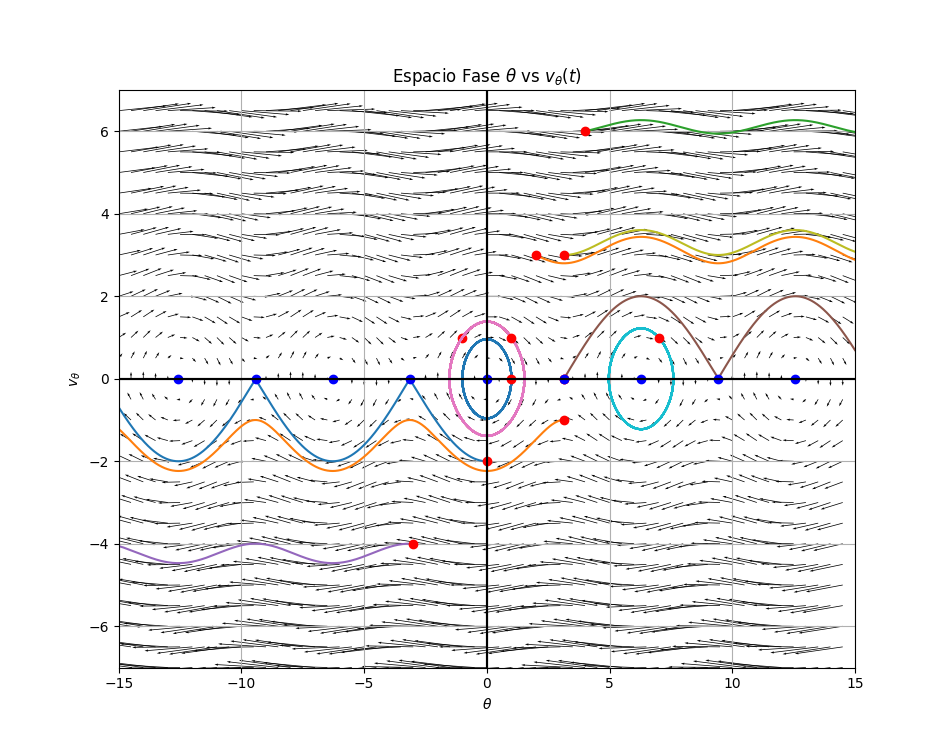

In [15]:
# Condciones para la grafica
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)

parametros = np.array([1.0])  # parametos (w0 = 1)

# Integrando y graficando varias solucuiones con condiciones
for i, j in [[1,0], [2,3], [4,6], [-1,1], [-3,-4], [3.15,0], [1,1], [np.pi,0], [np.pi, 3], [7,1], [0,-2], [np.pi,-1]]:
    x0 = np.array([i,j])

    X,T = EulerND(PenduloSimple,x0,0,50,0.0001,parametros)

    plt.plot(X[0],X[1])
    plt.plot(x0[0],x0[1],'ro')  #Condicion inicilal    

    
#### Grafica ######## 

for n in range(-5,5,1):  # graficando puntos de equilibrio  (en este caso (0,n*pi) )
    plt.plot(n*np.pi,0, 'bo') 
    
# Titulos de la grafica
plt.title("Espacio Fase $\\theta$ vs $v_{\\theta}(t)$")
plt.xlabel("$\\theta$")
plt.ylabel("$v_{\\theta}$")

# Ejes y limites de la grafica
plt.axhline(0, color='black')
plt.axvline(0, color='black') 
plt.xlim([-15, 15])
plt.ylim([-7, 7])

## Dibujando campo de pendientes 

CampoPend(PenduloSimple,-15, 15,-7,7,parametros,100,0.5)
# CampoPendNorm(PenduloSimple,-15, 15,-7,7,parametros,0.5) #version normalizada    
 



## Ejemplo: Sistema GENERAL de Lotka-Volterra

$\require{color}$

# $ \color{blue} \boxed{ \color{black} \dot{\vec{x}} = \displaystyle I \vec{x} \left[\vec{r} - A\vec{x} \right] }$ 

#### Donde $A$ se conoce como la **Matriz de Interacciones** y en cuando se linealiza el sistema alrredor de algún punto de equilbrio, da paso a lo que se conoce como *Comunity matrix*.

## $
\begin{pmatrix} 
\dot{x}_1  \\
\dot{x}_2  \\
\vdots \\
\dot{x}_n
\end{pmatrix}
=
\begin{pmatrix}
x_1 & 0 & \cdots & 0 \\
0 & x_2 & \cdots & 0 \\
\vdots  & \vdots  & \ddots & \vdots  \\
0 & 0 & \cdots & x_n
\end{pmatrix}
\left[
\begin{pmatrix} 
r_1  \\
r_2  \\
\vdots \\
r_n
\end{pmatrix}
-
\begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots  & \vdots  & \ddots & \vdots  \\
a_{m1} & a_{m2} & \cdots & a_{mn} 
\end{pmatrix}
\displaystyle
\begin{pmatrix} 
x_1  \\
x_2  \\
\vdots \\
x_n 
\end{pmatrix}
\right]
$

$\;$

# $ \color{red} \boxed{ \color{black} \dot{x_i} = \displaystyle \dfrac{dx_i}{dt} = x_i \left[r_i - \sum_j a_{ij}x_j \right]}$

$\;$

- Predador-Presa
- Competencia de Especies
- Intereacciones mutualistas
- etc.


Más sobre el **sistema general de Lotka-Volterra** en:

https://stefanoallesina.github.io/Sao_Paulo_School/intro.html#multi-species-dynamics


## Sistemas de dos especies

Partiendo del la euación anterior. Supongamos que $N$ representa la población de una especie, en algún ecosistema.

Ahora bien, partamos del caso sencillo de sólo dos especies.

## $ \displaystyle \dot{N_i} = N_i \left[r_i - \sum_j a_{ij}N_j \right] $ 


## $
\begin{pmatrix} 
\dot{N}_1  \\
\dot{N}_2  
\end{pmatrix}
=
\begin{pmatrix}
N_1 & 0 \\
0 & N_2 
\end{pmatrix}
\left[
\begin{pmatrix} 
r_1  \\
r_2  
\end{pmatrix}
-
\begin{pmatrix} 
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{pmatrix}
\begin{pmatrix} 
N_1  \\
N_2  
\end{pmatrix}
\right]
$

## $\;$

Con lo que tenemos:

## $
\color{blue} \boxed{ 
\color{black} \displaystyle \dot{N_1} = N_1  \left[r_1 - \left( a_{11}N_1  + a_{12}N_2 \right) \right] \\
\color{black} \displaystyle \dot{N_2} = N_2  \left[r_2 - \left( a_{21}N_1  + a_{22}N_2 \right) \right] 
}$


## Predador presa


Definamos las constantes de interacción $a_{ij}$ y las tazas de crecimiento (intrinsecas) $r_i$ de la siguiente manera:


### $a_{11} = a_{22} = 0 \; \; \; \;$ (No autointeracción)

### $a_{12} = \beta, \; \; a_{21} = - \delta$ 

### $r_1 = \alpha, \; \; r_2 = - \gamma$ 

$\;$

Con lo que tenemos:

## $\dot{N_1} = N_1  \left[\alpha - \beta N_2 \right]$ 
## $\dot{N_2} = N_2  \left[-\gamma + \delta N_1 \right]$ 

$\;$

Y reacomodando terminos tenenemos:

# $
\require{color}
\color{red} \boxed{ 
\color{black} \dot{N_1} = \alpha N_1 - \beta N_1 N_2 \\
\;\\
\color{black} \dot{N_2} = -\gamma N_2 + \delta N_1 N_2 
}$


### Los puntos de equilibrio son:

### $E_0 = (0,0)$

### $E_c = (\frac{\gamma}{\delta},\frac{\alpha}{\beta})$


### Para tener una version linealizada el sistema al rededor de cierto punto de equilibrio, calculamos la matrix Jacobiana:

## $
J = 
\begin{pmatrix} 
\alpha - \beta N2 & - \beta N1\\
\delta N2  & \delta N1 -\gamma\\
\end{pmatrix}
$


## $
J|_{(0,0)} = 
\begin{pmatrix} 
\alpha  &  0\\
0 & -\gamma \\
\end{pmatrix}
$   ; es un punto silla!

## $
J|_(\frac{\gamma}{\delta},\frac{\alpha}{\beta}) = 
\begin{pmatrix} 
0   &  - \frac{\gamma \beta}{\delta} \\
 \frac{\delta\alpha}{\beta} &  0 \\
\end{pmatrix}
$   ; es un centro!


In [17]:
def PredadorPresa(x,params):  # x es un vector en 2D  (x,v)
    alpha = params[0]
    beta = params[1]
    gama = params[2]
    delta = params[3]


    y = np.array(np.zeros(2))
    
    y[0] = alpha*x[0] - beta*x[0]*x[1]
    y[1] = -gama*x[1] + delta*x[0]*x[1] 

    return y

<IPython.core.display.Javascript object>


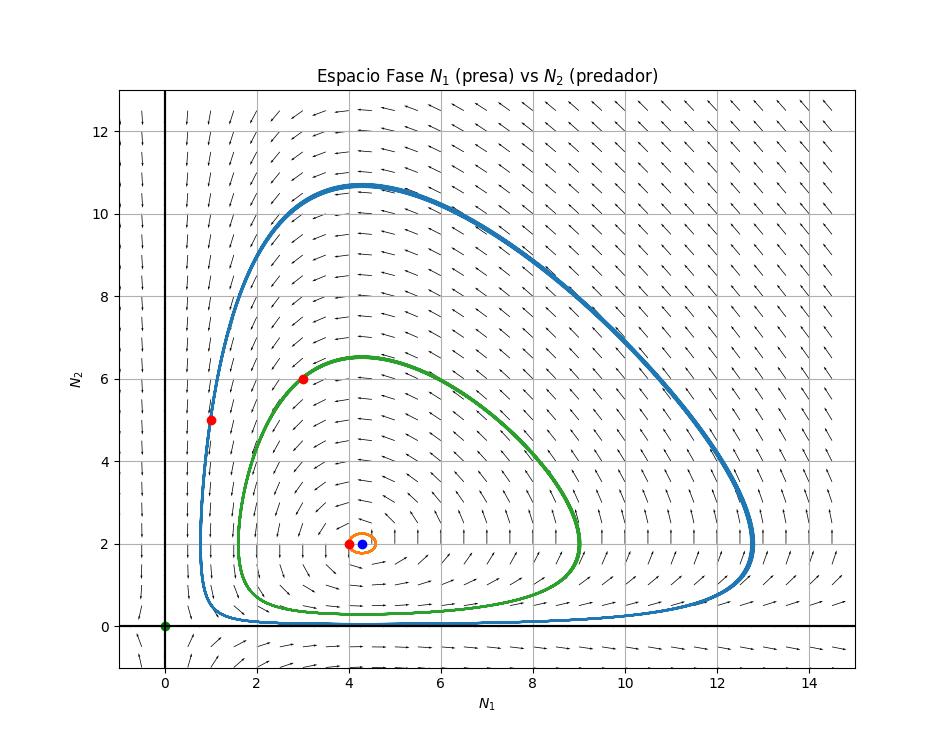

In [18]:
# Condciones para la grafica
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)

## Parametos 
alpha = 1
beta = .5
gama = 3
delta = .7

params = np.array([alpha,beta,gama,delta])


# Integrando y graficando varias solucuiones con condiciones
for i, j in zip([1, 4, 3], [5, 2, 6]): 
    x0 = np.array([i,j])

    X,T = EulerND(PredadorPresa,x0,0,50,0.0001,params)

    plt.plot(X[0],X[1])
    plt.plot(x0[0],x0[1],'ro')   #Condicion inicilal    
    
    
#### Grafica ######## 

# puntos de equilibrio  
plt.plot(0,0,'go')
plt.plot(gama/delta,alpha/beta,'bo')
   
# Titulos de la grafica
plt.title("Espacio Fase $N_1$ (presa) vs $N_2$ (predador)")
plt.xlabel("$N_1$")
plt.ylabel("$N_2$")

# Ejes y limites de la grafica
plt.axhline(0, color='black')
plt.axvline(0, color='black') 
plt.xlim([-1, 15])
plt.ylim([-1, 13])

## Dibujando campo de pendientes 

# CampoPend(PredadorPresa,-1, 15,-1,13,params,500,0.5)
CampoPendNorm(PredadorPresa,-1, 15,-1,13,params,0.5)


### Series de tiempo

<IPython.core.display.Javascript object>


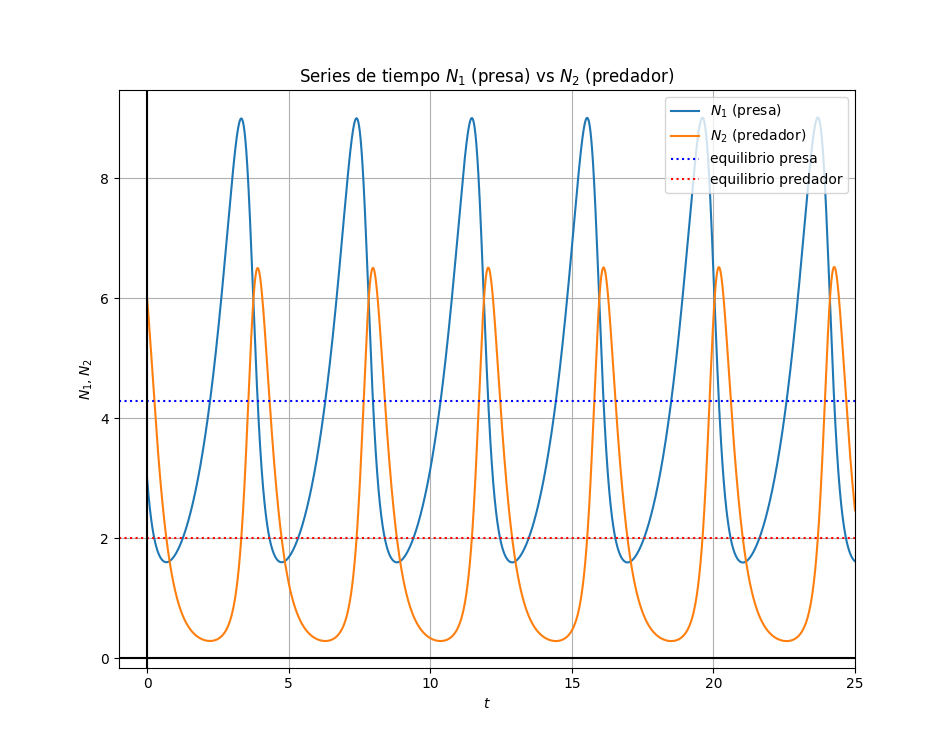

In [19]:
#### Grafica ######## 

fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)

plt.plot(T,X[0], label ='$N_1$ (presa)') 
plt.plot(T,X[1], label ='$N_2$ (predador)')

# valores de posible equilibrio  (coexistencia)  
plt.axhline(gama/delta, linestyle=':', color='blue', label=r'equilibrio presa')
plt.axhline(alpha/beta, linestyle=':', color='red', label=r'equilibrio predador')

   
# Titulos de la grafica
plt.title("Series de tiempo $N_1$ (presa) vs $N_2$ (predador)")
plt.xlabel("$t$")
plt.ylabel("$N_1,N_2$")

# Ejes y limites de la grafica
plt.axhline(0, color='black')
plt.axvline(0, color='black') 
plt.xlim([-1, 25])
# plt.ylim([-1, 10])

plt.legend(loc ="upper right")


## Competencia de Especies

Partiendo de nuestro sistema general de dos especies:

## $\displaystyle \dot{N_1} = N_1  \left[r_1 - \left( a_{11}N_1  + a_{12}N_2 \right) \right]$ 
## $\displaystyle \dot{N_2} = N_2  \left[r_2 - \left( a_{21}N_1  + a_{22}N_2 \right) \right]$ 

## $\;$

Definamos ahora, las constantes de interacción $a_{ij}$ en terminos de las tazas de crecimiento (intrinsecas) $r_i$ y de capacidades de carga $K_i$ para cada especie, de la siguiente manera:

### $a_{11} = \dfrac{r_1}{K_1}, \; \; a_{12} = \dfrac{r_1\alpha}{K_1} $ 

### $a_{21} = \dfrac{r_2\beta}{K_2}, \; \; a_{22} = \dfrac{r_2}{K_2}$ 


$\;$

Con lo que tenemos:


## $\dot{N_1} = N_1 \left[r_1 - \left( \dfrac{r_1N_1}{K_1}  + \dfrac{r_1\alpha N_2}{K_1} \right) \right]$ 
## $\dot{N_2} = N_2 \left[r_2 - \left( \dfrac{r_2\beta N_1}{K_2} + \dfrac{r_2N_2}{K_2} \right) \right]$ 

$\;$

Y reacomodando terminos tenenemos:


# $
\color{red} \boxed{ 
\color{black}  \dot{N_1} = r_1N_1 \left[1 - \dfrac{N_1 + \alpha N_2}{K_1} \right] \\ 
\;\\
\color{black}  \dot{N_2} = r_2N_2 \left[1 - \dfrac{N_2 + \beta N_1}{K_2} \right]
}$

## $\;$




In [20]:
def Competencia(x,params):  # x es un vector en 2D  (N1,N2)
    
    r1 = params[0]
    r2 = params[1]
    alpha = params[2]
    beta = params[3]
    K1 = params[4]
    K2 = params[5]
    
    
    y = np.array(np.zeros(2))
    
    y[0] = r1*x[0]*(1 - float(x[0]+alpha*x[1])/float(K1))
    y[1] = r2*x[1]*(1 - float(x[1]+beta*x[0])/float(K2))

    return y

### Isoclinas del sistema (rectas de equilibrio).

# $
N_2 = -\frac{1}{\alpha}N_1 + \frac{K_1}{\alpha} \\ 
\;\\
N_2 = -\beta N_1 + K_2 \\ 
$

In [21]:
def Iso1(x,K1,alpha):
    y = -float(x)/float(alpha) + float(K1)/float(alpha)
    return y 

def Iso2(x,K2,beta):
    y = -beta*x + K2
    return y 

<IPython.core.display.Javascript object>


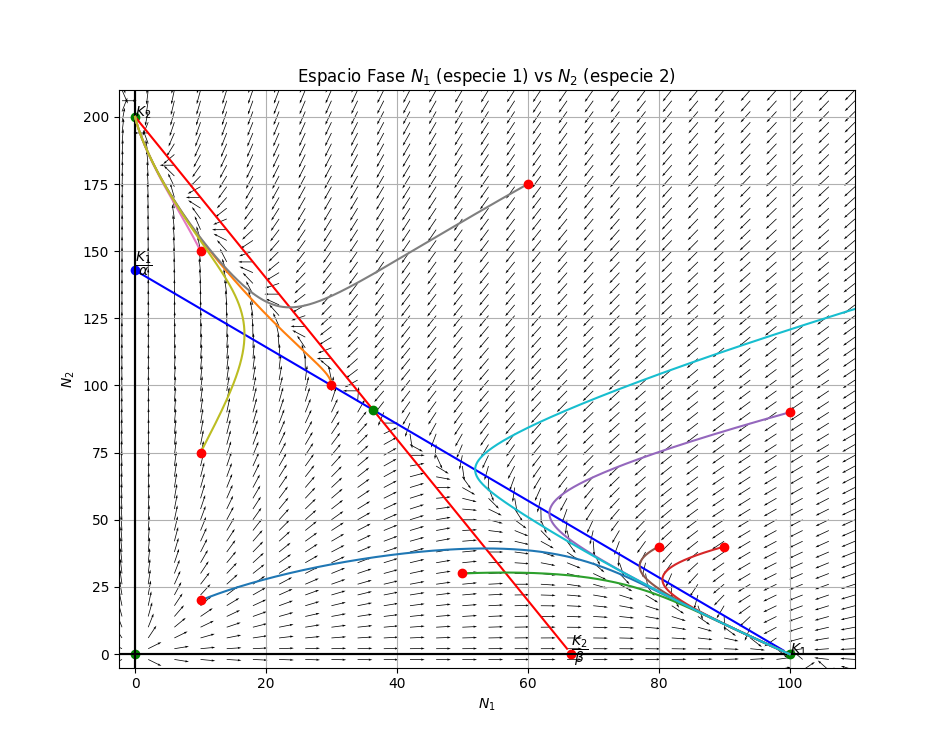

In [37]:
## Parametos 
r1 = 1
r2 = .5
alpha = .7
beta = 3
K1 = 100
K2 = 200

params = np.array([r1,r2,alpha,beta,K1,K2])


##### Grafica de Campo de Pendientes ########## 

fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)

# Intersecciones isoclinas con ejes X y Y
I1o = float(K1)/float(alpha)
I2x = float(K2)/float(beta)

Xmax = max(K1,I2x)
Ymax = max(K2,I1o)


# Titulos de la grafica
plt.title("Espacio Fase $N_1$ (especie 1) vs $N_2$ (especie 2)")
plt.xlabel("$N_1$")
plt.ylabel("$N_2$")

# Ejes y limites de la grafica
plt.axhline(0, color='black')
plt.axvline(0, color='black') 

# plt.xlim(-(Xmax)/20., Xmax+10)
# plt.ylim(-(Ymax)/20., Ymax+10)  

plt.xlim(-2.5, Xmax+10)
plt.ylim(-5, Ymax+10)  


## puntos de equilibrio (triviales)

plt.plot(0,0,'go')

plt.plot(K1,0,'go')
ax.text(K1,0,'$K_1$')   

plt.plot(0,K2,'go')
ax.text(0,K2,'$K_2$')


## Grafica de Rectas isoclinas

Y1 = []
Y2 = []

for x in range(K1):
    y1 = Iso1(x,K1,alpha)
    Y1.append(y1)

for x in np.arange(I2x):   
    y2 = Iso2(x,K2,beta)
    Y2.append(y2)

plt.plot(Y1,'b')
plt.plot(Y2,'r')

plt.plot(0,I1o,'bo')
ax.text(0,I1o,'$\dfrac{K_1}{\\alpha}$')

plt.plot(I2x,0,'ro')
ax.text(I2x,0,'$\dfrac{K_2}{\\beta}$')  

## punto de equilibrio (Interseccion Isoclinas)

E3x = float(K1-(K2*alpha))/float(1-(beta*alpha))
E3y = float(K2-(K1*beta))/float(1-(beta*alpha))
plt.plot(E3x,E3y,'go')


## Dibujando campo de pendientes 

# CampoPend(Competencia,-10,Xmax+20, -10,Ymax+20, params,1350, 5)  
CampoPendNorm(Competencia,-10,Xmax+20, -10,Ymax+20, params, 4)  


In [38]:
##### Integrando y graficando varias solucuiones con condiciones ########## 

for i, j in zip([10,30, 50, 90,100,80,10,60,10,140], [20,100, 30, 40,90,40,150,175,75,150]):
    x0 = np.array([i,j])

    X,T = EulerND(Competencia,x0,0,50,0.0001,params)

    plt.plot(X[0],X[1])
    plt.plot(x0[0],x0[1],'ro')   #Condicion inicilal    
    

<IPython.core.display.Javascript object>


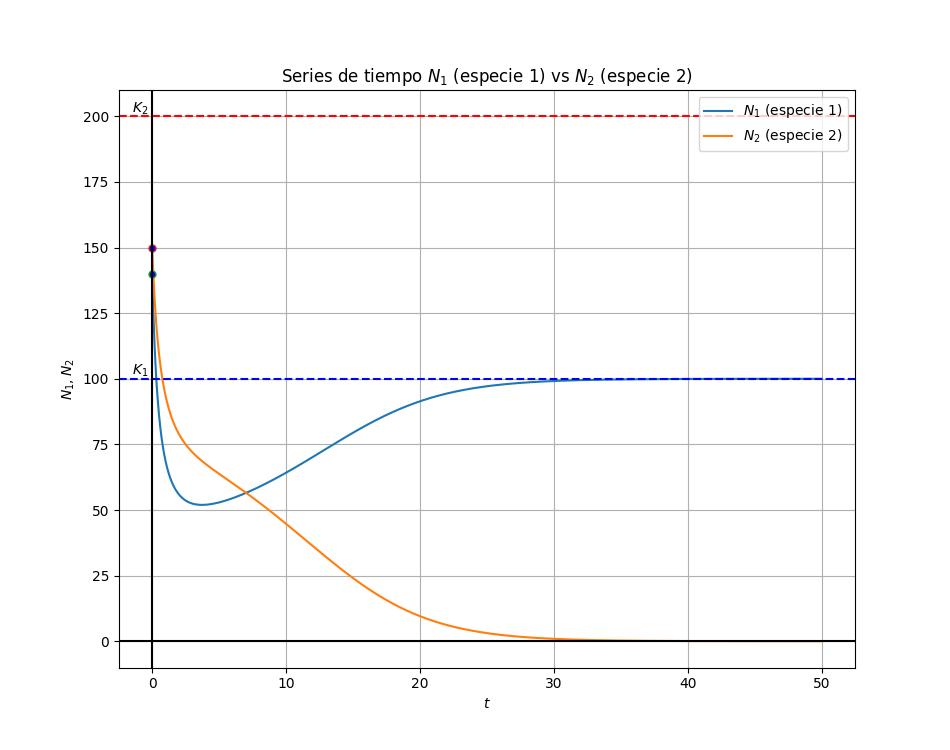

In [40]:
#### Grafica se serie de tiempo ######## 

fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)

plt.plot(T,X[0], label ='$N_1$ (especie 1)') 
plt.plot(T,X[1], label ='$N_2$ (especie 2)')


# Poblaciones Iniciales
plt.plot(0,x0[0], markerfacecolor='b', marker='o', markersize=5, alpha=1)
plt.plot(0,x0[1], markerfacecolor='b', marker='o', markersize=5, alpha=1)


# valores de equilibrio del sistema (dependiendo de los parametros)

plt.axhline(K1, linestyle='--', color='blue') # N1 domina  (N2 se extingue)
ax.text(-1.5,K1+1.5,'$K_1$')   
plt.axhline(K2, linestyle='--', color='green') # N2 domina  (N1 se extingue)
ax.text(-1.5,K2+1.5,'$K_2$')

# plt.axhline(E3x, linestyle=':', color='blue', label=r'valor de coexistencia N1')
# plt.axhline(E3y, linestyle=':', color='red', label=r'valor de coexistencia N2')

 
# Titulos de la grafica
plt.title("Series de tiempo $N_1$ (especie 1) vs $N_2$ (especie 2)")
plt.xlabel("$t$")
plt.ylabel("$N_1,N_2$")
    
# Ejes y limites de la grafica
plt.axhline(0, color='black')
plt.axvline(0, color='black') 
# plt.xlim(-2.5, Xmax+10)
# plt.ylim(-5, Ymax+10)  

# plt.legend(loc ="upper center")
plt.legend()

# Ejercicios:
$\;$
    <ol>
   <li>
#### Analice analíticamente el sistema de **Predador-Presa**:
   </li>      
   
$
\;
\dot{N_1} = \alpha N_1 - \beta N_1 N_2 \\
\;\\
\dot{N_2} = -\gamma N_2 + \delta N_1 N_2 
$    

Donde $\alpha, \beta, \gamma, \delta $ son constantes positivas.
<br> 
        <ol><br>
            <li> 
       Muestre **_analíticamente_** que el origen $E_0 = (0,0)$ (*extinción total*), siempre tiene una  estabilidad de **_punto silla_**, con una dirección **positiva** (*atractora*) y una **negativa** (*repulsora*), para cualesquiera que sean los valores de los parámetros del modelo.
            </li>            
            <li>
Muestre **_analíticamente_** que el punto de equilibrio $E_c = (\frac{\gamma}{\delta},\frac{\alpha}{\beta})$ (*equilibrio de coexistencia*), tiene una estabilidad de tipo **_centro_**.           
            </li>
        </ol>
   </li>    
</li>
$\;$  
   <li>
Estudie analíticamente el sistema de <b>Competencia de Especies</b>:
        </li> 
$\;$  
$
\;
\dot{N_1} = r_1N_1 \left[1 - \dfrac{N_1 + \alpha N_2}{K_1} \right] \\ 
\;\\
\dot{N_2} = r_2N_2 \left[1 - \dfrac{N_2 + \beta N_1}{K_2} \right]
$    

Donde $r_1, r_2, K_1, K_2, \alpha, \beta $ son constantes positivas.
<br> 
        <ol><br>
            <li> 
       <b>Linealice el sistema cerca de sus puntos de equilibrio:</b> 
  
 <ol>             
<li> Encuentre los <b>4 puntos de equilibrio</b> del sistema, (los tres triviales, y la interesección de las Isoclinas)</li>
<li> Calcule análiticamente la matrix Jacobiana del Sistema </li>
<li> Evalue el Jacobiano del Sistema en los  puntos de equilibrio</li>
<li> Calcule el espectro (conjunto de valores y vectores propios) en cada caso</li>
  </ol>
 </li> <br> 
            
     
  <li>       
<b>Analice la estabilidad de los puntos de equilibrio, respecto a los parametros del modelo:</b>              
 <ol>             
<li>Demuestre que el $E_0 = (0,0)$ siempre es un punto fuente (repulsor) independensientemente de los valores de los parametros del modelo.</li>
<li> Calcule la estabilidad de los puntos $E_1$ y $E_2$</li>
<li>Muestre analiticamnte bajo que parametros del sistema existe el punto $E_3$ y bajo que condiciones tiene una dirección atractora o bien una repulsora </li>
</ol> 
 </li>   <br>  
    
  <li>       
Muestre computacionalmente el plano fase (es decir el campo de pendientes ası́ como las isoclinas del sistema) y graifique algunas curvas solución que apoyen la descripción cualitativa realizada, para los <b>4 posibles casos</b> de estabilidad del sistema.
 </li>   <br>     
            


   

</ol>

</ol>

## Puntos extra (sobre calificación final de la tarea)


<ol>
    
   <li> 
<b> ¿Cómo se tendría que modificar el modelo de predador presa para que pudiera haber una coexistencia
que no fuera una oscilación, sino que las poblaciones alcanzaran valores estables?</b>
Justifique y argumente ampliamente su respuesta.  

Apóyese y modifique el código visto en clase, para mostrar una grafica del plano fase del sistema modificado bajo esas condiciones, que complemente y refuerce su respuesta .
       
(<b>1 pto extra</b>)     
        </li>   
 
 <br> 
    
   <li>
Estudie analíticamente el sistema de <b>Lotka-Volterra generalizado</b> para dos especies:
        </li>     
    
$
\dot{N_1} = N_1 \left[r_1 - \left( a_{11}N_1  + a_{12}N_2 \right) \right] \\
\dot{N_2} = N_2 \left[r_2 - \left( a_{21}N_1  + a_{22}N_2 \right) \right] 
$    

Donde $r_i$ son constantes positivas y $a_{ij}$ son coeficientes reales.
        <ol><br>
            <li> 
       <b>Analice cualitativamente el sistema, linealizandolo:</b> 
  
 <ol>             
<li> Encuentre los <b>3 puntos de equilibrio</b> no triviales del sistema</li>     
<li> Calcule la forma general de los <b>puntos de equilibrio</b> no triviales del sistema. <i>Hint: recuerde la Regla de Cramer</i></li>
<li> Calcule análiticamente la matrix Jacobiana del Sistema </li>
<li> Evalue el Jacobiano del Sistema en todos los puntos de equilibrio</li>
<li> Calcule la forma general del polinomio caracteristico del Jacobiano evaluado en los los puntos de equilibrio del sistema.<i>Hint: recuerde la forma general del mismo, usando la traza y el determinante</i></li>
<li> Con base en el inciso anterior, discuta brevemente que estabilidad tendrían los puntos de equilibrio, de acuerdo a los diferentes parametros del sistema.</li>   
  </ol>
 </li> <br> 
            
    
  <li>       
Muestre computacionalmente el plano fase (es decir el campo de pendientes ası́ como las isoclinas del sistema) y graifique algunas curvas solución que apoyen la descripción cualitativa general del sistema. De ser posible use <a href="https://kapernikov.com/ipywidgets-with-matplotlib/">Ipywidgets</a> para poder variar de forma interactiva los parametros.
      
(<b>2 ptos extra</b>)         
      
 </li>  
   
</ol>